In [ ]:
# Carga de datos (un subset obtenido al exportar datos filtrados con R pertenecientes solo a China y a USA)
# También carga de paquetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
china_usa=pd.read_csv("china_usa.csv")

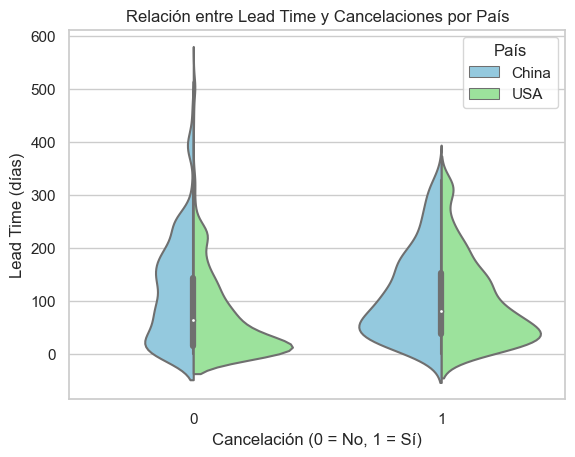

In [ ]:
# Creación de un violinplot con Seaborn
sns.violinplot(
    data=china_usa,
    x="is_canceled",
    y="lead_time",
    hue="country",
    split=True,
    palette={"China": "skyblue", "USA": "lightgreen"}
)
plt.title("Relación entre Lead Time y Cancelaciones por País")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Lead Time (días)")
plt.legend(title="País")
plt.show()


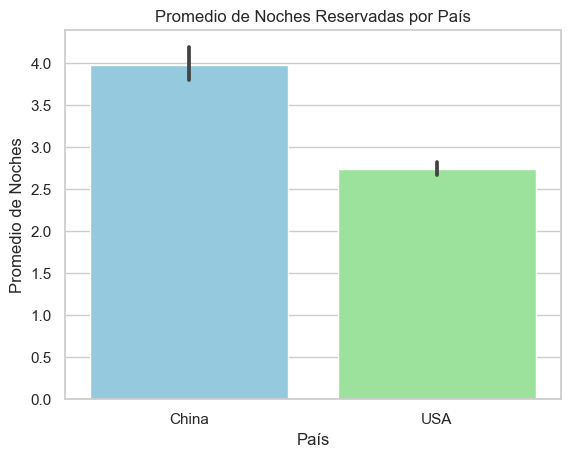

In [5]:
china_usa["total_nights"] = china_usa["stays_in_weekend_nights"] + china_usa["stays_in_week_nights"]

sns.barplot(
    data=china_usa,
    x="country",
    y="total_nights",
    estimator="mean",
    palette={"China": "skyblue", "USA": "lightgreen"}
)
plt.title("Promedio de Noches Reservadas por País")
plt.xlabel("País")
plt.ylabel("Promedio de Noches")
plt.show()


In [7]:
# Crear una nueva columna para el número total de turistas
china_usa["tourists"] = china_usa["adults"] + china_usa["children"] + china_usa["babies"]

# Agrupar por país y mes, sumando el número de turistas
grouped_data = (
    china_usa.groupby(["country", "arrival_date_month"])["tourists"]
    .sum()
    .reset_index()
)

# Ordenar los meses correctamente
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
grouped_data["arrival_date_month"] = pd.Categorical(
    grouped_data["arrival_date_month"], categories=month_order, ordered=True
)

# Pivotear los datos para preparar el gráfico
pivot_data = grouped_data.pivot(index="arrival_date_month", columns="country", values="tourists")
pivot_data = pivot_data.fillna(0)  # Rellenar valores faltantes con 0
print(pivot_data)

country             China  USA
arrival_date_month            
January                35  143
February               54  151
March                 201  297
April                 116  373
May                   369  505
June                  308  592
July                  576  669
August                362  656
September             344  334
October               194  268
November               44  127
December               31  191


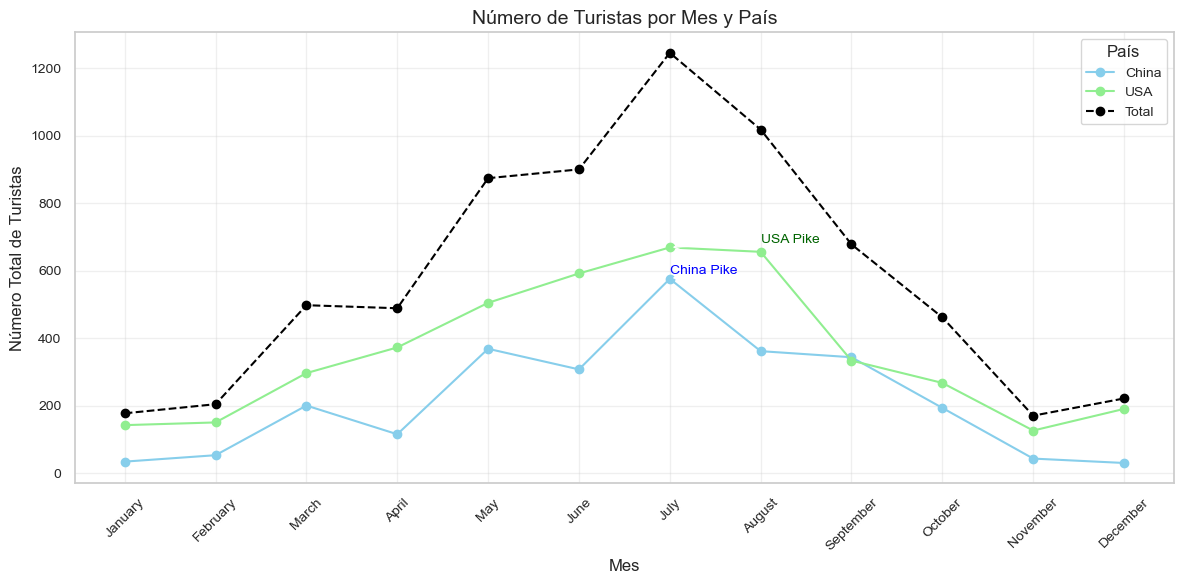

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado `data`
# Crear una nueva columna para el número total de turistas
china_usa["tourists"] = china_usa["adults"] + china_usa["children"] + china_usa["babies"]

# Agrupar por país y mes, sumando el número de turistas
grouped_data = (
    china_usa.groupby(["country", "arrival_date_month"])["tourists"]
    .sum()
    .reset_index()
)

# Ordenar los meses correctamente
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
grouped_data["arrival_date_month"] = pd.Categorical(
    grouped_data["arrival_date_month"], categories=month_order, ordered=True
)

# Pivotear los datos para preparar el gráfico
pivot_data = grouped_data.pivot(index="arrival_date_month", columns="country", values="tourists")
pivot_data = pivot_data.fillna(0)  # Rellenar valores faltantes con 0

# Calcular el total de turistas por mes
pivot_data["Total"] = pivot_data.sum(axis=1)

# Gráfico de líneas con puntos
plt.figure(figsize=(12, 6))

# Definir colores específicos para cada país
colors = {"China": "skyblue", "USA": "lightgreen", "Total": "black"}

# Graficar cada país y el total
for country in pivot_data.columns:
    plt.plot(
        pivot_data.index, pivot_data[country],
        marker='o', label=country, color=colors.get(country, "gray"),
        linestyle='--' if country == "Total" else '-'
    )

# Anotaciones para destacar picos
plt.annotate(
    "USA Pike", 
    xy=("July", pivot_data.loc["July", "USA"]),  # Coordenadas del pico
    xytext=("August", pivot_data.loc["July", "USA"] + 13),  # Ajustar la ubicación del texto
    arrowprops=dict(facecolor="green", arrowstyle="->"),  # Flecha
    fontsize=10, color="darkgreen"
)
plt.annotate(
    "China Pike", 
    xy=("July", pivot_data.loc["July", "China"]),  # Coordenadas del pico
    xytext=("July", pivot_data.loc["July", "China"] + 13),  # Ajustar la ubicación del texto
    arrowprops=dict(facecolor="blue", arrowstyle="->"),  # Flecha
    fontsize=10, color="blue"
)

# Etiquetas y estilo
plt.title("Número de Turistas por Mes y País", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Número Total de Turistas", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="País", fontsize=10, title_fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

